In [20]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf  # 딥러닝 라이브러리
from tensorflow.keras import layers, models  # 신경망 계층 및 모델 설계
from tensorflow.keras.datasets import mnist  # MNIST 데이터셋
import matplotlib.pyplot as plt  # 시각화 도구
import numpy as np

In [3]:
# 2. 데이터 로드 및 전처리
# MNIST 데이터셋은 이미 나뉘어 제공 (학습/테스트 데이터)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
#MNIST 이미지는 28x28 크기, 채널 정보 추가 (흑백 이미지는 채널 1개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0 # 0~1로 정규화
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [8]:
# 레이블을 One-Hot Encoding (숫자 0~9를 백터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1: # shape이 (n, )인지 확인
    y_train = tf.keras.utils.to_categorical(y_train, 10)
if len(y_test.shape) == 1: # shape이 (n, )인지 확인
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
# 3. CNN 모델 정의
model = models.Sequential() # 순차적 모델 선언

In [10]:
# 첫번째 합성곱 계층 : 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 폴링 계층 : 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2, 2)))

c:\AIProject\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 두번째 합성곱 계층 : 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
# 세번째 합성곱 계층 : 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

In [14]:
# Fully Connected Layer 1 : 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

In [15]:
# 출력층 : 뉴런 수 10(클래스 수), 활성화 함수 SoftMax
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 4. 모델 컴파일
model.compile(optimizer='adam',                 # 최적화 알고리즘
              loss='categorical_crossentropy',  # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])             # 평가 지표 : 정확도

In [18]:
# 5. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4999 - loss: 1.4067 - val_accuracy: 0.8968 - val_loss: 0.3297
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8972 - loss: 0.3268 - val_accuracy: 0.9385 - val_loss: 0.2069
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9355 - loss: 0.2118 - val_accuracy: 0.9435 - val_loss: 0.1824
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9533 - loss: 0.1492 - val_accuracy: 0.9650 - val_loss: 0.1193
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9657 - loss: 0.1133 - val_accuracy: 0.9683 - val_loss: 0.1020


In [19]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도 : {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 22.7336
테스트 정확도 : 0.9458


In [21]:
# 7. 결과 확인 : 테스트 데이터에서 임의의 이미지 예측
# 테스트 데이터에서 첫번째 샘플을 가져옴
sample_image = x_test[0] # 첫번째 이미지 저장
sample_label = np.argmax(y_test[0]) # y_test[0] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장

In [22]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


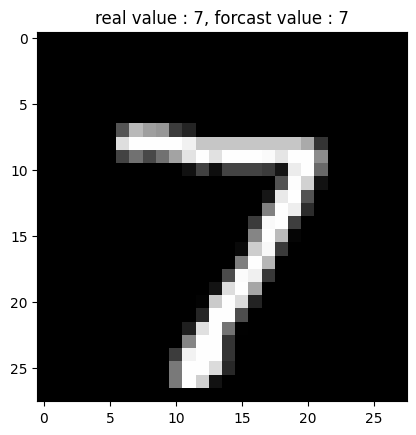

In [23]:
# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value : {sample_label}, forcast value : {predicted_label}")
plt.show()